In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
from sklearn.datasets import make_classification

In [45]:
X, y = make_classification(n_classes=2,n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1)

In [46]:
X

array([[-3.26752894, -0.50534592],
       [ 0.66796751, -2.536359  ],
       [-1.31948707, -0.35798049],
       ...,
       [-2.12395332, -0.95799304],
       [-1.42430674,  1.29594461],
       [-0.50445067,  1.80256546]])

In [47]:
y

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [48]:
X = pd.DataFrame(X)
X

,0,1
0,-3.267529,-0.505346
1,0.667968,-2.536359
2,-1.319487,-0.357980
3,-1.669517,-3.011893
4,-1.583091,0.306293
...,...,...
995,-0.333316,-2.058940
996,-1.934034,-2.381754
997,-2.123953,-0.957993
998,-1.424307,1.295945


<Axes: >

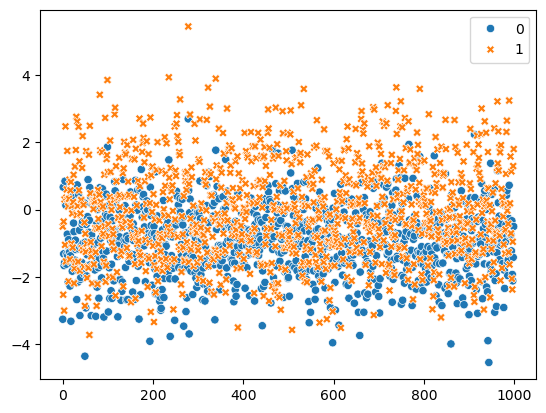

In [49]:
sns.scatterplot(X)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [52]:
svc = SVC(kernel="linear")

In [54]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[103  24]
 [  9 114]]
0.868


In [55]:
svc2 = SVC(kernel="rbf")
svc2.fit(x_train,y_train)
y_pred2 = svc2.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[101  26]
 [  4 119]]
0.88


In [56]:
svc3 = SVC(kernel="sigmoid")
svc3.fit(x_train,y_train)
y_pred3 = svc3.predict(x_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

[[102  25]
 [ 33  90]]
0.768


In [59]:
svc4 = SVC(kernel="poly")
svc4.fit(x_train,y_train)
y_pred4 = svc4.predict(x_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))

[[123   4]
 [ 62  61]]
0.736


In [57]:
## now using hyper parameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {"C" : [0.1,1,10,100,1000],
          "gamma" : [1,0.1,0.01,0.001,0.0001],
          "kernel" : ["rbf","sigmoid","poly","linear"]}

In [61]:
grid = GridSearchCV(SVC(),param_grid=params)

In [62]:
grid.fit(x_train,y_train,)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']})

In [63]:
y_pred_grid = grid.predict(x_test)
print(accuracy_score(y_pred_grid,y_test))
print(confusion_matrix(y_pred_grid,y_test))

0.888
[[103   4]
 [ 24 119]]


In [67]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}